In [1]:
#! conda install -y pandas-datareader

#! conda install -y mplfinance

In [2]:
# Provides ways to work with large multidimensional arrays
import numpy as np 
# Allows for further data manipulation and analysis
import pandas as pd
from pandas_datareader import data as web # Reads stock data 
import matplotlib.pyplot as plt # Plotting
import matplotlib.dates as mdates # Styling dates
%matplotlib inline

import datetime as dt # For defining dates
import mplfinance as mpf # Matplotlib finance

## Function that Saves Stock Data to CSV

In [3]:
# Function that gets a dataframe by providing a ticker and starting date
def save_to_csv_from_yahoo(ticker, syear, smonth, sday, eyear, emonth, eday):
    
    # Defines the time periods to use
    start = dt.datetime(syear, smonth, sday)
    end = dt.datetime(eyear, emonth, eday)
    
    # Reads data into a dataframe
    df = web.DataReader(ticker, 'yahoo', start, end)
    
    # Save data to a CSV file
    # For Windows
    # df.to_csv('C:/Users/derek/Documents/Python Finance/Python/' + ticker + '.csv')
    # For MacOS
    df.to_csv("../csv/" + ticker + '.csv')
    return df

## Function that Returns a Dataframe from a CSV

In [4]:
# Reads a dataframe from the CSV file, changes index to date and returns it
def get_df_from_csv(ticker):
    
    # Try to get the file and if it doesn't exist issue a warning
    try:
        # For Windows
        # df = pd.read_csv('C:/Users/derek/Documents/Python Finance/Python/' + ticker + '.csv')
        # For MacOS
        df = pd.read_csv("../csv/" + ticker + '.csv')
    except FileNotFoundError:
        print("File Doesn't Exist")
    else:
        return df

## Add Daily Return to Dataframe

In [5]:
# We calculate a percentage rate of return for each day to compare investments.
# Simple Rate of Return = (End Price - Beginning Price) / Beginning Price OR (EP / BP) - 1

# Shift provides the value from the previous day
# NaN is displayed because there was no previous day price for the 1st calculation
def add_daily_return_to_df(df, ticker):
    df['daily_return'] = (df['Adj Close'] / df['Adj Close'].shift(1)) - 1
    # Save data to a CSV file
    # For Windows
    # df.to_csv('C:/Users/derek/Documents/Python Finance/Python/' + ticker + '.csv')
    # For MacOS
    df.to_csv("../csv/" + ticker + '.csv')
    return df  

## Returns Total Return over Time

In [6]:
def get_return_defined_time(df, syear, smonth, sday, eyear, emonth, eday):
    # Create string representations for the dates
    start = f"{syear}-{smonth}-{sday}"
    end = f"{eyear}-{emonth}-{eday}"
    df['Date'] = pd.to_datetime(df['Date'])
    
    # Use a mask to grab data between defined dates
    mask = (df['Date'] >= start) & (df['Date'] <= end)
    
    # Get the mean of the column named daily return
    daily_ret = df.loc[mask]['daily_return'].mean()
    
    # Get the number of days between 2 dates
    df2 = df.loc[mask]
    days = df2.shape[0]

    # Return the total return between 2 dates
    return (days * daily_ret)

## Matplotlib Finance

In [7]:
# Receives a ticker and the date range for which to plot
def mplfinance_plot(ticker, chart_type, syear, smonth, sday, eyear, emonth, eday):
    # Create string representations for the dates
    start = f"{syear}-{smonth}-{sday}"
    end = f"{eyear}-{emonth}-{eday}"
    
    try:
        # For Windows
        # df = pd.read_csv('C:/Users/derek/Documents/Python Finance/Python/' + ticker + '.csv',index_col=0,parse_dates=True)
        # For MacOS
        df = pd.read_csv('../csv/' + ticker + '.csv',index_col=0,parse_dates=True)
    except FileNotFoundError:
        print("File Doesn't Exist")
    else:
        
        # Set data.index as DatetimeIndex
        df.index = pd.DatetimeIndex(df['Date'])
        
        # Define to only use data between provided dates
        df_sub = df.loc[start:end]
        
        # A candlestick chart demonstrates the daily open, high, low and closing price of a stock
        mpf.plot(df_sub,type='candle')

        # Plot price changes
        mpf.plot(df_sub,type='line')

        # Moving averages provide trend information (Average of previous 4 observations)
        mpf.plot(df_sub,type='ohlc',mav=4)
        
        # Define a built in style
        s = mpf.make_mpf_style(base_mpf_style='charles', rc={'font.size': 8})
        # Pass in the defined style to the whole canvas
        fig = mpf.figure(figsize=(14, 12), style=s) 
        # Candle stick chart subplot
        ax = fig.add_subplot(2,1,1) 
        # Volume chart subplot
        av = fig.add_subplot(2,1,2, sharex=ax)  

        # You can plot multiple MAVs, volume, non-trading days
        mpf.plot(df_sub,type=chart_type, mav=(5,150,200), ax=ax, volume=av, show_nontrading=True)

## Simple Price Plot

In [8]:
# Creates a simple price / date plot between dates
def price_plot(ticker, syear, smonth, sday, eyear, emonth, eday):
    # Create string representations for the dates
    start = f"{syear}-{smonth}-{sday}"
    end = f"{eyear}-{emonth}-{eday}"
    
    try:
        # For Windows
        # df = pd.read_csv('C:/Users/derek/Documents/Python Finance/Python/' + ticker + '.csv')
        # For MacOS
        df = pd.read_csv("../csv/" + ticker + '.csv')
    except FileNotFoundError:
        print("File Doesn't Exist")
    else:
        
        # Set data.index as DatetimeIndex
        df.index = pd.DatetimeIndex(df['Date'])
        
        # Define to only use data between provided dates
        df_sub = df.loc[start:end]
        
        # Convert to Numpy array
        df_np = df_sub.to_numpy()
        
        # Get adjusted close data from the 5th column
        np_adj_close = df_np[:,5]
        
        # Get date from the 1st
        date_arr = df_np[:,1]
        
        # Defines area taken up by the plot
        fig = plt.figure(figsize=(12,8),dpi=100)
        axes = fig.add_axes([0,0,1,1])
        
        # Define the plot line color as navy
        axes.plot(date_arr, np_adj_close, color='navy')
        
        # Set max ticks on the x axis
        axes.xaxis.set_major_locator(plt.MaxNLocator(8))
        
        # Add a grid, color, dashes(5pts 1 pt dashes separated by 2pt space)
        axes.grid(True, color='0.6', dashes=(5, 2, 1, 2))
        
        # Set grid background color
        axes.set_facecolor('#FAEBD7')

## Download Multiple Stocks

In [9]:
def download_multiple_stocks(syear, smonth, sday, eyear, emonth, eday, *args):
    for x in args:
        save_to_csv_from_yahoo(x, syear, smonth, sday, eyear, emonth, eday)

## Merge Multiple Stocks in One Dataframe by Column Name

In [10]:
def merge_df_by_column_name(col_name, syear, smonth, sday, eyear, emonth, eday, *tickers):
    # Will hold data for all dataframes with the same column name
    mult_df = pd.DataFrame()
    
    start = f"{syear}-{smonth}-{sday}"
    end = f"{eyear}-{emonth}-{eday}"
    
    for x in tickers:
        mult_df[x] = web.DataReader(x, 'yahoo', start, end)[col_name]
        
    return mult_df

## Get Changing Value of Investment using Multiple Stocks

In [11]:
def plot_return_mult_stocks(investment, stock_df):
    (stock_df / stock_df.iloc[0] * investment).plot(figsize = (15,6))

## Get Standard Deviation for Multiple Stocks

Risk is a measure of the variability of return. Variance and Standard Deviation allow us to quantify risk.


Variance is a measure of how spread out a data set is. It is calculated as the average squared deviation of each number from the mean of a data set.n It equals the sum of the squares of the difference between each data point and the mean divided by the number of data points minus 1.

$s^2$ = $\frac{\sum (x - \hat{x})^2}{N - 1}$

Example : If we have 3 annual returns of 23%, -8% and 15%. The mean return is 10%.

* $(23 - 10)^2$ = 169
* $(-8 - 10)^2$ = 324
* $(15 - 10)^2$ = 25
* = 169 + 324 + 25 = 518 / (3-1) = 259 = 2.59

---

Standard deviation is a measure of the amount of variation within a set of values. A low standard deviation indicates that the values tend to be close to the mean. A high standard deviation means values are more spread out. To get the Standard Deviation find the square root of the variance.

$\sqrt{s^2}$ = $\sqrt{2.59}$ = 1.609

In [12]:
# Receives the dataframe with the Adj Close data along with the stock ticker
# Returns the mean and standard deviation associated with the ticker
def get_stock_mean_sd(stock_df, ticker):
    return stock_df[ticker].mean(), stock_df[ticker].std()

In [13]:
# Receives the dataframe with the stock ticker as the column name and
# the Adj Close values as the column data and returns the mean and 
# standard deviation
def get_mult_stock_mean_sd(stock_df):
    for stock in stock_df:
        mean, sd = get_stock_mean_sd(stock_df, stock)
        cov = sd / mean
        print("Stock: {:4} Mean: {:7.2f} Standard deviation: {:2.2f}".format(stock, mean, sd))
        print("Coefficient of Variation: {}\n".format(cov))

## Test Functions

In [14]:
# Call to read the data from Yahoo into a CSV and then retrieve a Dataframe
AMZN = save_to_csv_from_yahoo('AMZN', 2020, 1, 1, 2021, 1, 1)
HYG = save_to_csv_from_yahoo('HYG', 2020, 1, 1, 2021, 1, 1)

In [15]:
# Retrieve data from the CSV file
AMZN = get_df_from_csv('AMZN')
AMZN

,Date,High,Low,Open,Close,Volume,Adj Close
0,2020-01-02,1898.010010,1864.150024,1875.000000,1898.010010,4029000,1898.010010
1,2020-01-03,1886.199951,1864.500000,1864.500000,1874.969971,3764400,1874.969971
2,2020-01-06,1903.689941,1860.000000,1860.000000,1902.880005,4061800,1902.880005
3,2020-01-07,1913.890015,1892.040039,1904.500000,1906.859985,4044900,1906.859985
4,2020-01-08,1911.000000,1886.439941,1898.040039,1891.969971,3508000,1891.969971
...,...,...,...,...,...,...,...
248,2020-12-24,3202.000000,3169.000000,3193.899902,3172.689941,1451900,3172.689941
249,2020-12-28,3304.000000,3172.689941,3194.000000,3283.959961,5686800,3283.959961
250,2020-12-29,3350.649902,3281.219971,3309.939941,3322.000000,4872900,3322.000000
251,2020-12-30,3342.100098,3282.469971,3341.000000,3285.850098,3209300,3285.850098


In [16]:
HYG = get_df_from_csv('HYG')
HYG

,Date,High,Low,Open,Close,Volume,Adj Close
0,2020-01-02,88.320000,88.050003,88.099998,88.309998,15756600.0,80.611588
1,2020-01-03,88.279999,88.040001,88.120003,88.220001,17342200.0,80.529434
2,2020-01-06,88.180000,88.050003,88.110001,88.129997,17936900.0,80.447266
3,2020-01-07,88.160004,88.040001,88.139999,88.050003,9640300.0,80.374252
4,2020-01-08,88.230003,88.019997,88.070000,88.129997,16088100.0,80.447266
...,...,...,...,...,...,...,...
248,2020-12-24,87.050003,86.940002,86.949997,87.050003,7327300.0,83.619957
249,2020-12-28,87.230003,87.040001,87.180000,87.160004,22575500.0,83.725624
250,2020-12-29,87.309998,87.040001,87.309998,87.050003,22893000.0,83.619957
251,2020-12-30,87.279999,87.080002,87.080002,87.230003,21080100.0,83.792870


In [17]:
# Add daily return to function
my_df = add_daily_return_to_df(AMZN, 'AMZN')

In [18]:
my_df.describe()

,High,Low,Open,Close,Volume,Adj Close,daily_return
count,253.000000,253.000000,253.000000,253.000000,2.530000e+02,253.000000,252.000000
mean,2716.941377,2642.261857,2681.004191,2680.855096,4.930991e+06,2680.855096,0.002437
std,554.291416,539.598841,551.169361,545.761043,1.976161e+06,545.761043,0.024260
min,1759.449951,1626.030029,1641.510010,1676.609985,1.451900e+06,1676.609985,-0.079221
25%,2166.070068,2124.110107,2142.149902,2149.870117,3.474300e+06,2149.870117,-0.010483
50%,2955.560059,2871.000000,2906.500000,2890.300049,4.526600e+06,2890.300049,0.002493
75%,3202.000000,3130.489990,3179.989990,3165.120117,5.789300e+06,3165.120117,0.014537
max,3552.250000,3486.689941,3547.000000,3531.449951,1.556730e+07,3531.449951,0.079295


In [19]:
my_df = add_daily_return_to_df(HYG, 'HYG')

In [20]:
tot_ret = get_return_defined_time(HYG, 2020, 1, 1, 2021, 1, 1)
print("Total Return :", tot_ret)

Total Return : 0.05478522924124467


In [21]:
# Get total return between dates
tot_ret = get_return_defined_time(AMZN, 2020, 1, 1, 2021, 1, 1)
print("Total Return :", tot_ret)

Total Return : 0.6166401575831238


In [22]:
df2 = AMZN.iloc[[0, -1]]

In [23]:
df2

,Date,High,Low,Open,Close,Volume,Adj Close,daily_return
0,2020-01-02,1898.010010,1864.150024,1875.0,1898.010010,4029000,1898.010010,NaN
252,2020-12-31,3282.919922,3241.199951,3275.0,3256.929932,2957200,3256.929932,-0.008801


In [24]:
rate_return = (df2.iloc[1]['Adj Close'] - df2.iloc[0]['Adj Close'])/df2.iloc[0]['Adj Close']
rate_return

0.7159708931370734

In [25]:
a = (df2.iloc[1]['Adj Close'] / df2.iloc[0]['Adj Close']) - 1
a

0.7159708931370734

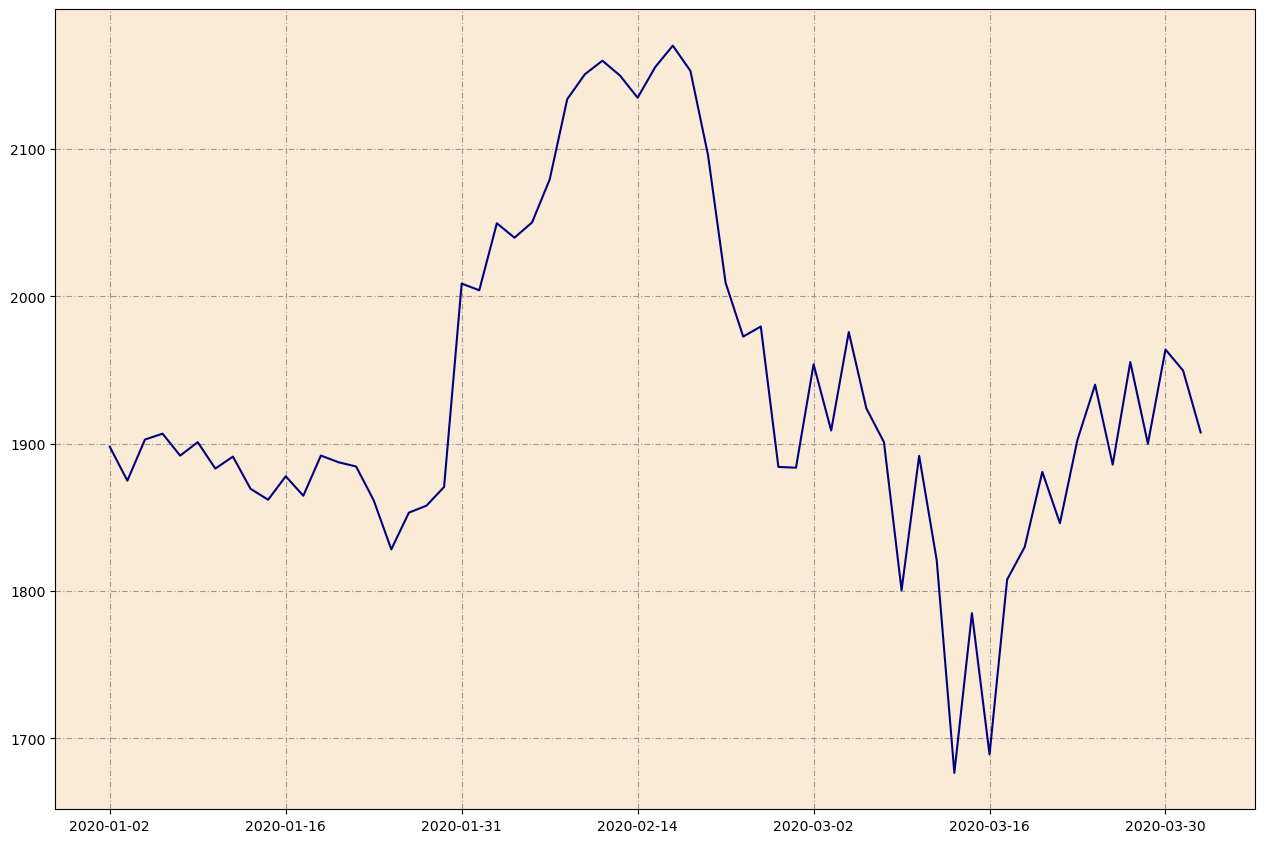

In [26]:
price_plot('AMZN', 2020, 1, 1, 2020, 4, 1)

In [27]:
ticker='AMZN'
df = pd.read_csv('../csv/' + ticker + '.csv',index_col=0,parse_dates=True)

syear=2020
eyear=2021
sday=1
eday=1
smonth=1
emonth=1

start = f"{syear}-{smonth}-{sday}"
end = f"{eyear}-{emonth}-{eday}"
    
df
# # Set data.index as DatetimeIndex
df.index = pd.DatetimeIndex(df['Date'])

# df

# # Define to only use data between provided dates
df_sub = df.loc[start:end]

df_sub


,Date,High,Low,Open,Close,Volume,Adj Close,daily_return
Date,,,,,,,,
2020-01-02,2020-01-02,1898.010010,1864.150024,1875.000000,1898.010010,4029000,1898.010010,NaN
2020-01-03,2020-01-03,1886.199951,1864.500000,1864.500000,1874.969971,3764400,1874.969971,-0.012139
2020-01-06,2020-01-06,1903.689941,1860.000000,1860.000000,1902.880005,4061800,1902.880005,0.014886
2020-01-07,2020-01-07,1913.890015,1892.040039,1904.500000,1906.859985,4044900,1906.859985,0.002092
2020-01-08,2020-01-08,1911.000000,1886.439941,1898.040039,1891.969971,3508000,1891.969971,-0.007809
...,...,...,...,...,...,...,...,...
2020-12-24,2020-12-24,3202.000000,3169.000000,3193.899902,3172.689941,1451900,3172.689941,-0.003949
2020-12-28,2020-12-28,3304.000000,3172.689941,3194.000000,3283.959961,5686800,3283.959961,0.035071
2020-12-29,2020-12-29,3350.649902,3281.219971,3309.939941,3322.000000,4872900,3322.000000,0.011584


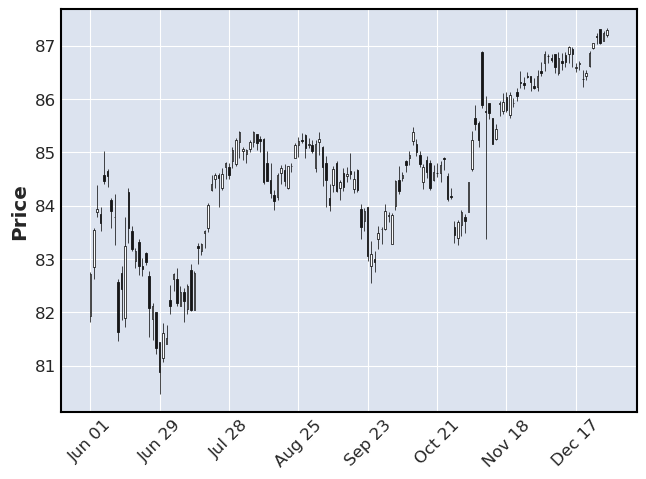

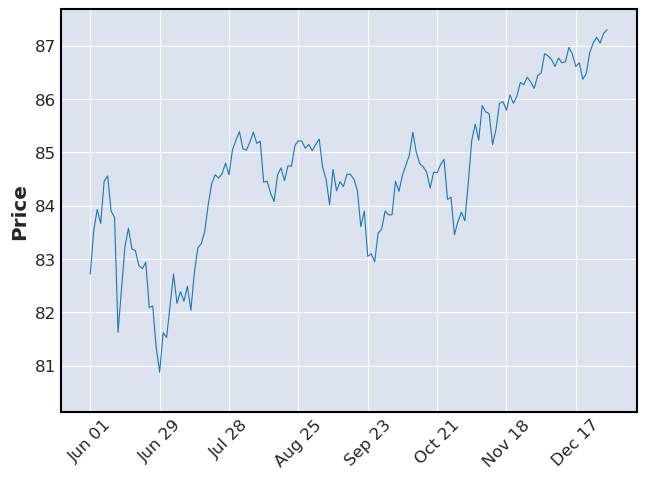

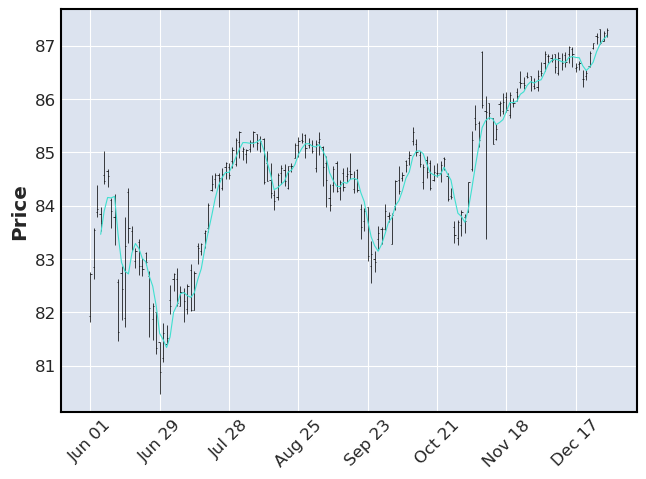

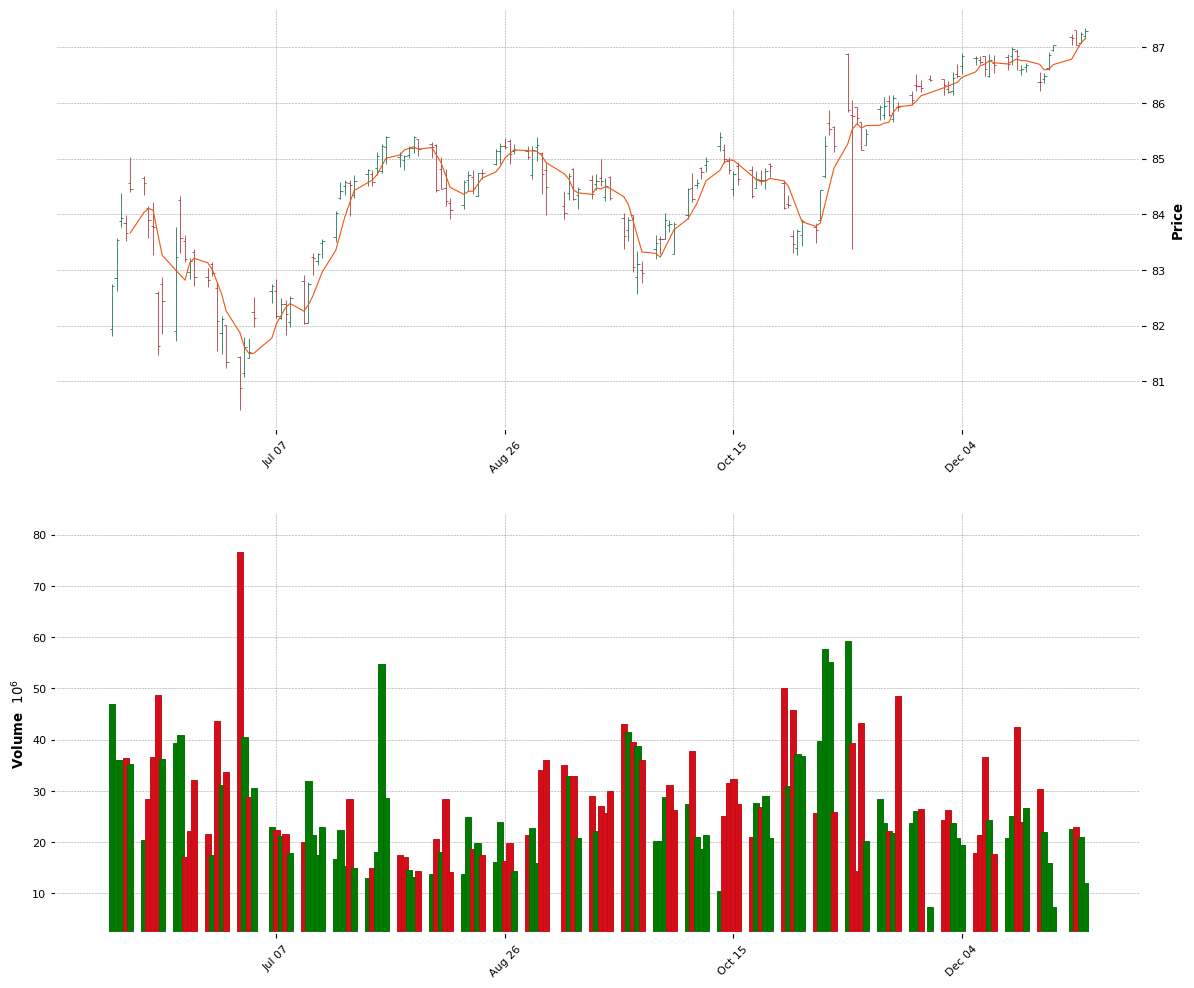

In [28]:
mplfinance_plot('HYG', 'ohlc', 2020, 6, 1, 2021, 1, 1)

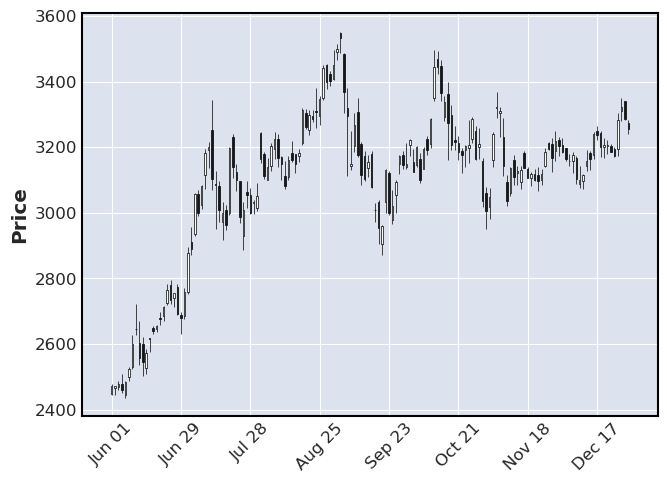

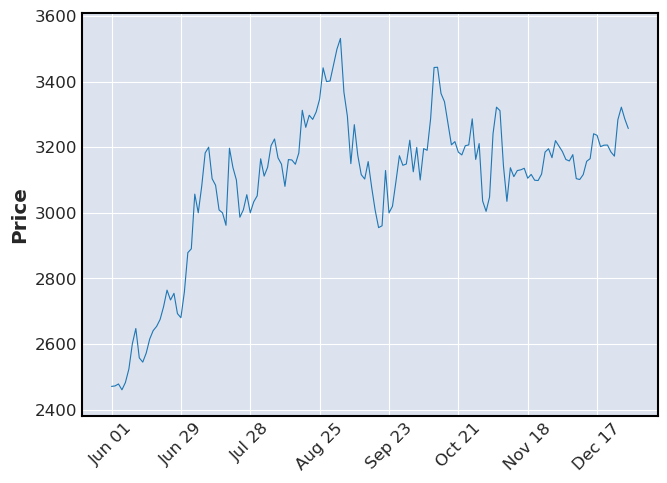

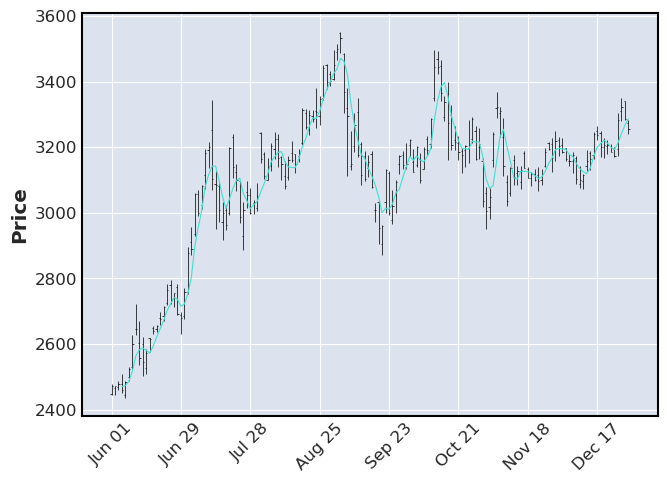

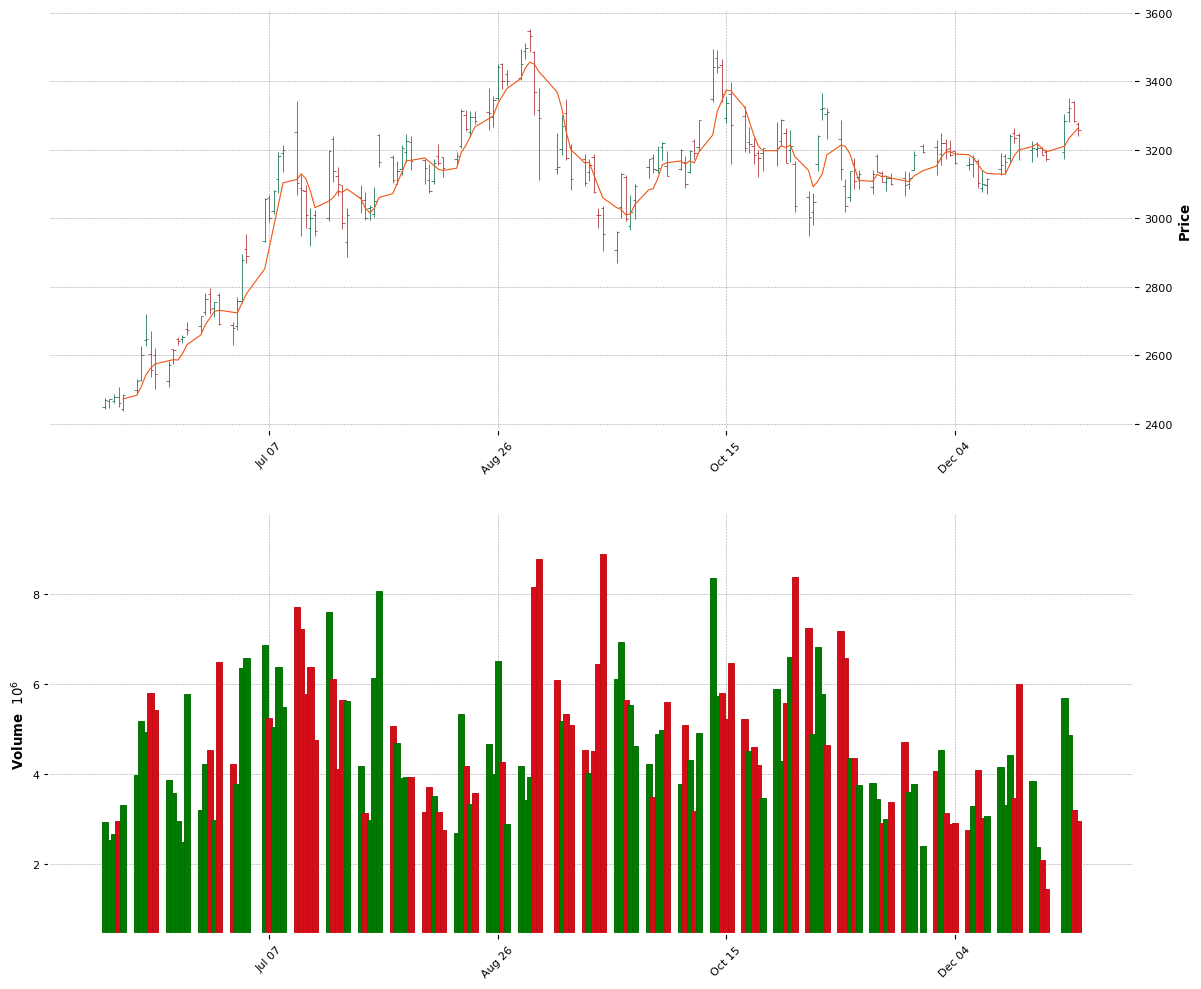

In [29]:
# Use Matplotlib finance to print multiple charts
mplfinance_plot('AMZN', 'ohlc', 2020, 6, 1, 2021, 1, 1)

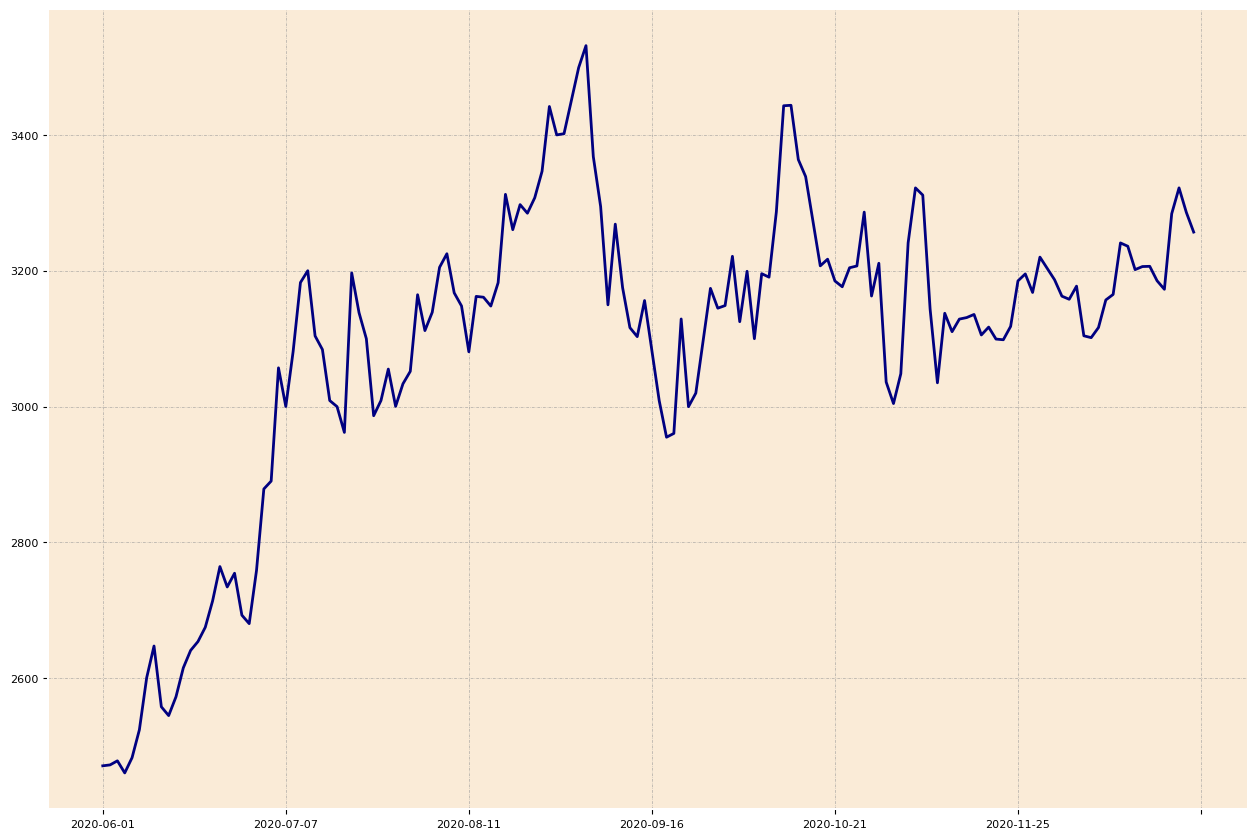

In [30]:
price_plot('AMZN', 2020, 6, 1, 2021, 1, 1)

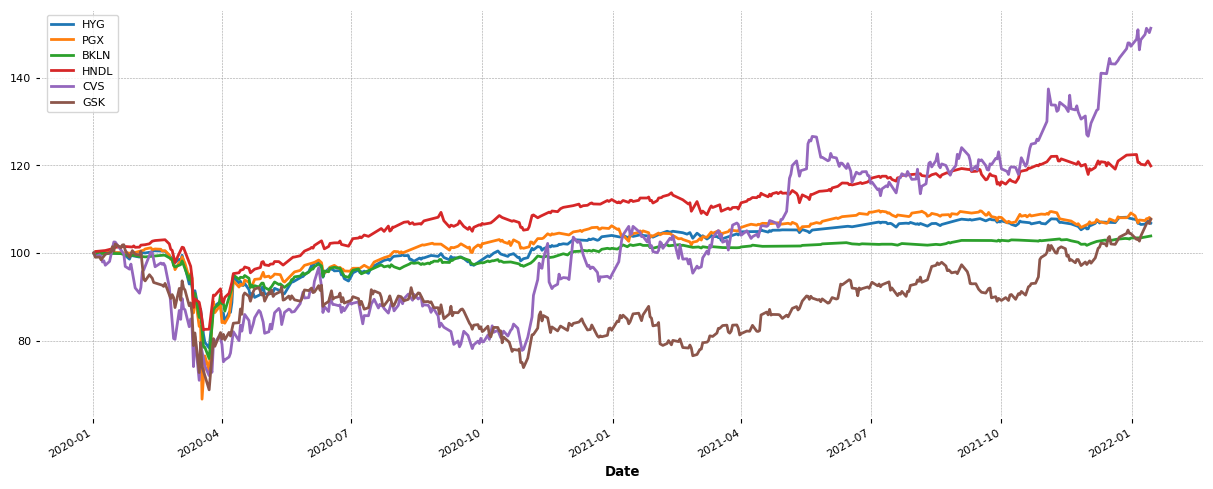

In [31]:
# Download multiple stocks
tickers = ["FB", "AAPL", "NFLX", "GOOG"]
# download_multiple_stocks(2020, 1, 1, 2021, 1, 1, *tickers)

# Merge dataframes from multiple stocks using the same column name
tickers = ["FB", "AMZN", "AAPL", "NFLX", "GOOG"]
tickers = ['HYG', 'PGX', 'BKLN', 'HNDL', 'CVS', 'GSK']
mult_df = merge_df_by_column_name('Adj Close',  2020, 1, 1, 2022, 1, 31, *tickers)
mult_df.tail()

# Pass Investment Amount and Plot Returns using Multiple Stocks
plot_return_mult_stocks(100, mult_df)

In [32]:
# Pass multiple stocks with their adjusted close values to receive their
# different means and standard deviations
get_mult_stock_mean_sd(mult_df)
mult_df

# It is hard to compare stocks by standard deviation when their stock prices
# are so different. The coefficient of variation is the ratio between the 
# standard deviation and the mean and it provides a comparable standard deviation
# We get it by dividing the standard deviation by the mean cov = std / mean
# We see here that GOOG has the least amount of variability

Stock: HYG  Mean:   81.93 Standard deviation: 4.52
Coefficient of Variation: 0.05511966648189426

Stock: PGX  Mean:   14.14 Standard deviation: 0.83
Coefficient of Variation: 0.05897958568047631

Stock: BKLN Mean:   21.24 Standard deviation: 0.85
Coefficient of Variation: 0.040205602060152085

Stock: HNDL Mean:   23.13 Standard deviation: 1.74
Coefficient of Variation: 0.07512464825813238

Stock: CVS  Mean:   72.54 Standard deviation: 13.03
Coefficient of Variation: 0.17968758439067292

Stock: GSK  Mean:   37.73 Standard deviation: 2.97
Coefficient of Variation: 0.0786742818005449



,HYG,PGX,BKLN,HNDL,CVS,GSK
Date,,,,,,
2020-01-02,80.611610,13.741547,21.365255,21.102970,70.098305,42.217495
2020-01-03,80.529427,13.786957,21.365255,21.180731,69.540611,41.821598
2020-01-06,80.447273,13.759711,21.374599,21.180731,69.814720,41.839600
2020-01-07,80.374268,13.723385,21.365255,21.163448,69.550056,41.578659
2020-01-08,80.447273,13.741547,21.402628,21.172087,68.680450,41.758614
...,...,...,...,...,...,...
2022-01-10,85.940002,14.760000,22.129999,25.342159,105.059998,44.840000
2022-01-11,86.339996,14.820000,22.160000,25.501230,106.040001,45.040001
2022-01-12,86.480003,14.820000,22.170000,25.541000,105.779999,45.240002


In [33]:
mult_df.describe()

,HYG,PGX,BKLN,HNDL,CVS,GSK
count,515.000000,515.000000,515.000000,515.000000,515.000000,515.000000
mean,81.928720,14.137459,21.242864,23.126816,72.539777,37.725475
std,4.515884,0.833821,0.854082,1.737394,13.034497,2.968025
min,63.189327,9.166268,16.229279,17.405968,49.769173,29.058098
25%,79.626682,13.764702,20.863444,21.864038,61.405790,35.385260
50%,83.558357,14.333219,21.617613,23.385578,70.276352,37.777615
75%,85.707363,14.773512,21.803595,24.583727,83.315887,39.253525
max,87.250000,15.072886,22.199800,25.849201,106.044998,45.505001
